In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
columns = [
       'Question 2: Sound (1-5)', 'Question 2.1: Music (1-5)',
       'Question 2.2 : Noise control (1-5)',
       'Question 2.3 : Speaking Style (1-5)', 'Question 3: Camera (1-5)',
       'Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)',
       'Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)',
       'Question 4.2: Color (1-5)', 'Question 5: Content (1-5)',
       'Question 5.1: Introduction (0-1)',
       'Question 5.2: Food description (0-1)', 'Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)',
       'Question 6.2: Recommendation (0-1)',
       'Question 6.3: Clear information (0-1)']
core_columns = [
       'Question 2: Sound (1-5)','Question 3: Camera (1-5)',
       'Question 4: Images (1-5)', 'Question 5: Content (1-5)',
       'Question 6: Reviewer (1-5)',]
output_column = 'Attractive Level (1-5)'

In [3]:
pf = pd.read_csv('../Data/median_data.csv')

In [4]:
# import pingouin as pg
# icc = pg.intraclass_corr(data=pf[['video id', 'Annotater', 'Attractive Level (1-5)']][:100], targets='video id', raters='Annotater',
#                          ratings='Attractive Level (1-5)',nan_policy='omit')
# icc.to_csv('../Data/icc.csv')
# print(icc)

<AxesSubplot:xlabel='Attractive Level (1-5)', ylabel='Count'>

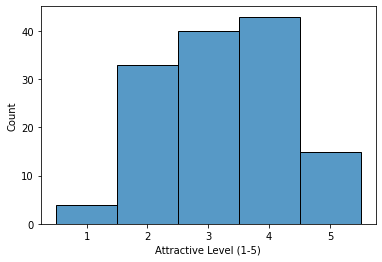

In [5]:
sns.histplot(pf['Attractive Level (1-5)'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])

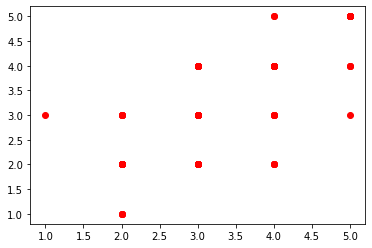

In [6]:
plt.plot(pf['Question 2: Sound (1-5)'], pf['Attractive Level (1-5)'], 'ro')

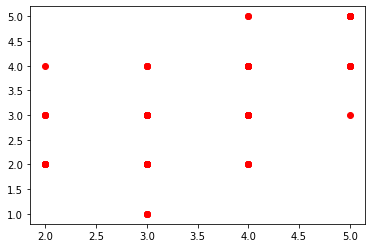

In [7]:
plt.plot(pf['Question 4: Images (1-5)'], pf['Attractive Level (1-5)'], 'ro')

In [8]:
pf.columns

Index(['Unnamed: 0', 'video id', 'Question 2: Sound (1-5)',
       'Question 2.1: Music (1-5)', 'Question 2.2 : Noise control (1-5)',
       'Question 2.3 : Speaking Style (1-5)', 'Question 3: Camera (1-5)',
       'Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)',
       'Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)',
       'Question 4.2: Color (1-5)', 'Question 5: Content (1-5)',
       'Question 5.1: Introduction (0-1)',
       'Question 5.2: Food description (0-1)', 'Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)',
       'Question 6.2: Recommendation (0-1)',
       'Question 6.3: Clear information (0-1)', 'Attractive Level (1-5)'],
      dtype='object')

<AxesSubplot:>

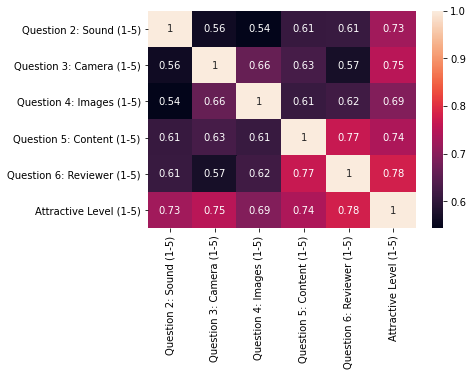

In [9]:
sns.heatmap(pf[core_columns + [output_column]].corr(), annot=True)

In [21]:
def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr = df.corr()
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

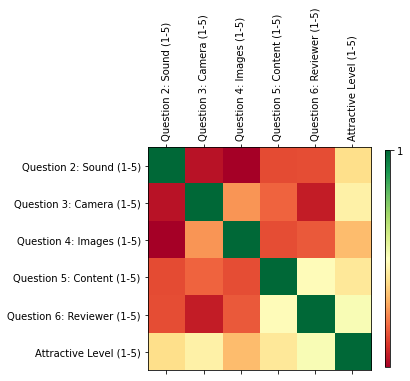

In [23]:
plot_corr(pf[core_columns + [output_column]])

In [31]:
import scipy
import scipy.cluster.hierarchy as sch

X = pf.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [pf.columns.tolist()[i] for i in list((np.argsort(ind)))]
df = pf.reindex(columns, axis=1)

<ipython-input-31-0d0a6e613a71>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X = pf.corr().values


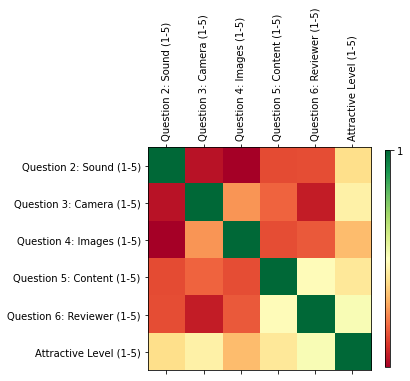

In [32]:
plot_corr(pf[core_columns + [output_column]], size=5)

In [19]:
import pandas as pd
import scipy.cluster.hierarchy as spc

corr = pf[core_columns + [output_column]].corr().values

pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')

<AxesSubplot:>

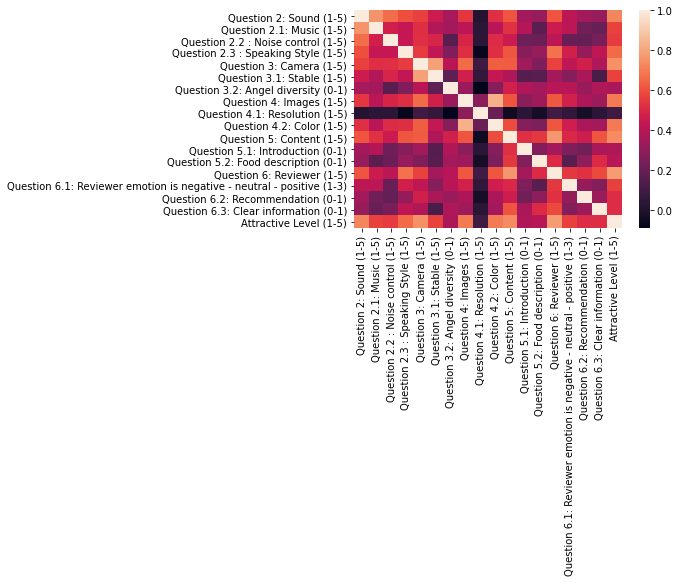

In [10]:
sns.heatmap(pf[columns + [output_column]].corr(), annot=False)

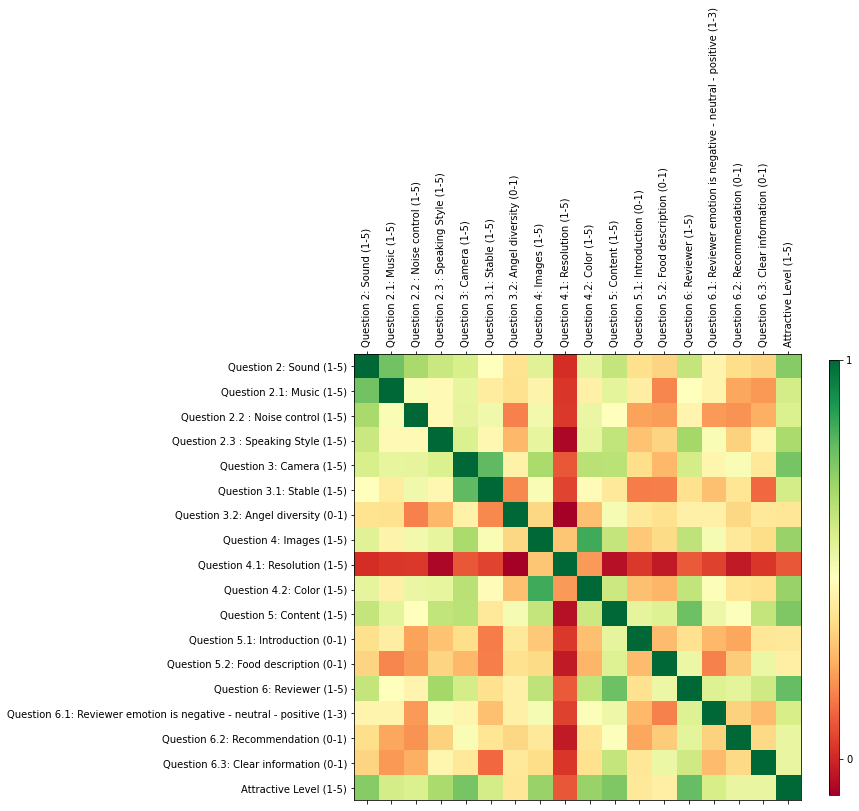

In [26]:
plot_corr(pf[columns + [output_column]])

In [29]:
import scipy
import scipy.cluster.hierarchy as sch

X = pf.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [pf.columns.tolist()[i] for i in list((np.argsort(ind)))]
df = pf.reindex(columns, axis=1)

<ipython-input-29-0d0a6e613a71>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X = pf.corr().values


<ipython-input-21-44ed64c0ada4>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


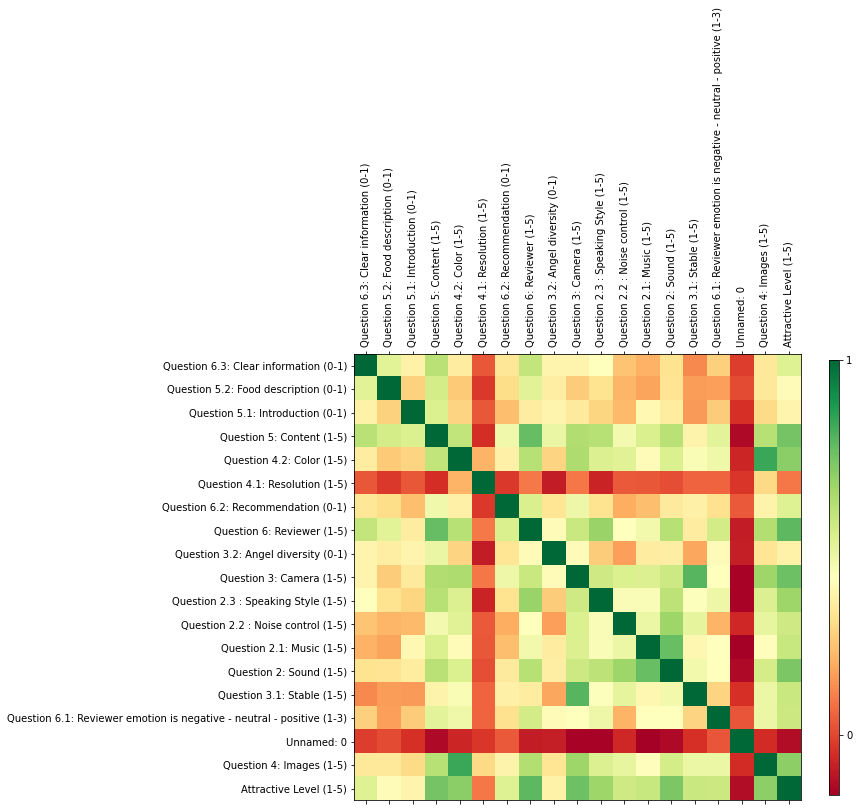

In [30]:
plot_corr(pf[columns + [output_column]])

<AxesSubplot:>

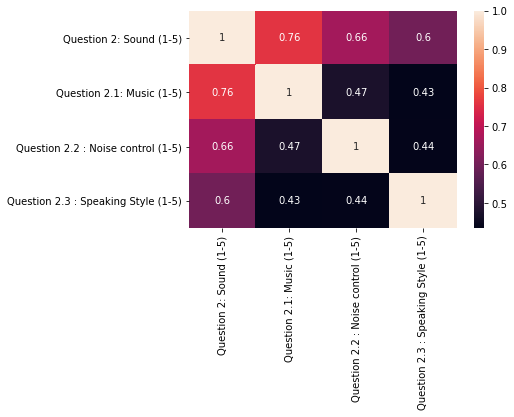

In [11]:
sns.heatmap(pf[['Question 2: Sound (1-5)', 'Question 2.1: Music (1-5)',
       'Question 2.2 : Noise control (1-5)', 'Question 2.3 : Speaking Style (1-5)']].corr(),annot=True)

<AxesSubplot:>

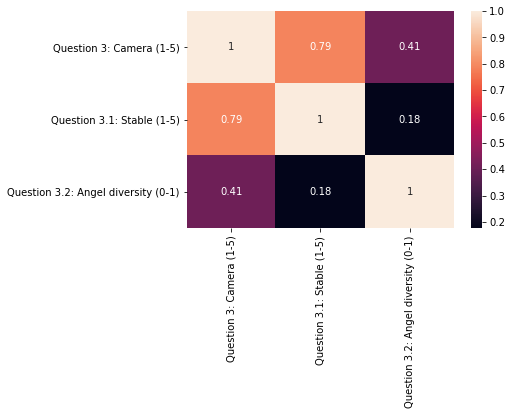

In [12]:
sns.heatmap(pf[['Question 3: Camera (1-5)', 'Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)']].corr(),annot=True)

<AxesSubplot:>

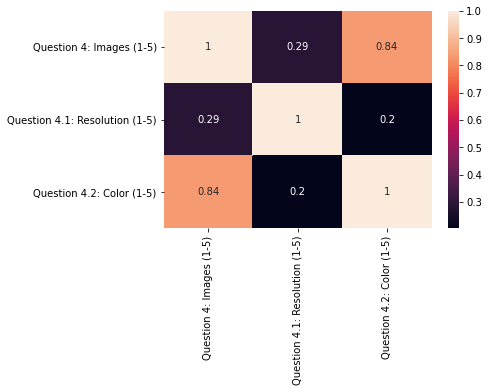

In [13]:
sns.heatmap(pf[['Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)',
       'Question 4.2: Color (1-5)']].corr(),annot=True)

<AxesSubplot:>

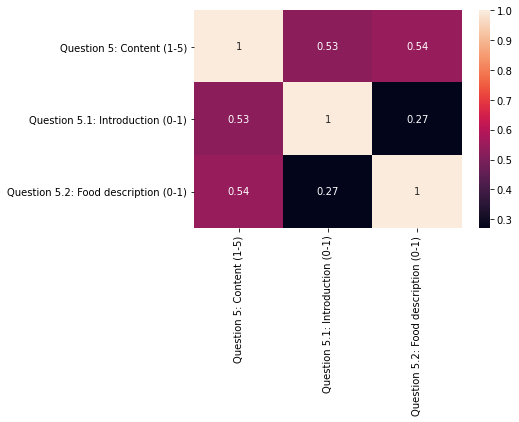

In [14]:
sns.heatmap(pf[['Question 5: Content (1-5)',
       'Question 5.1: Introduction (0-1)',
       'Question 5.2: Food description (0-1)']].corr(),annot=True)

<AxesSubplot:>

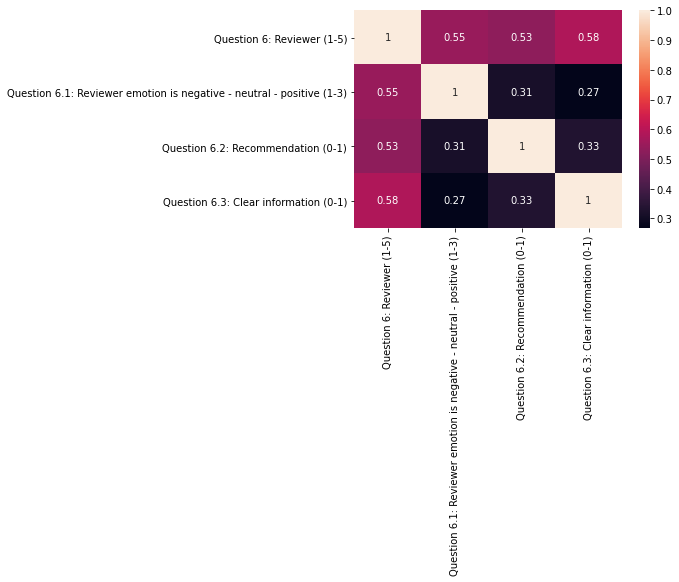

In [15]:
sns.heatmap(pf[['Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)',
       'Question 6.2: Recommendation (0-1)',
       'Question 6.3: Clear information (0-1)']].corr(),annot=True)

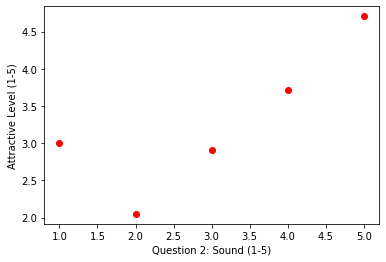

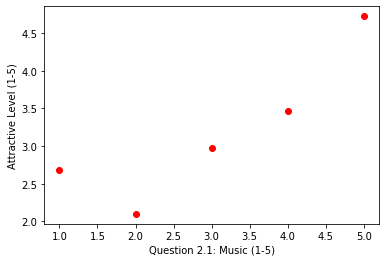

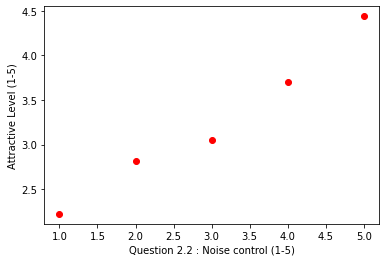

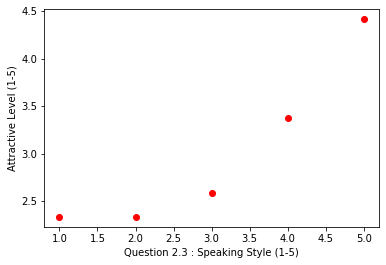

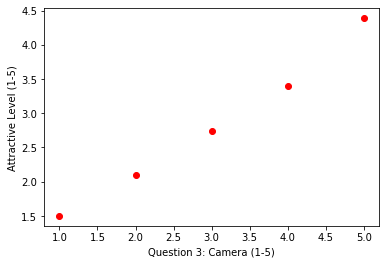

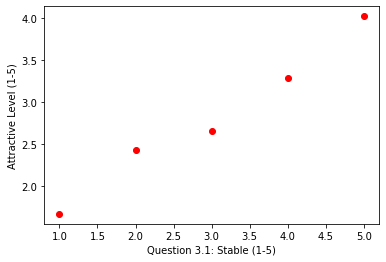

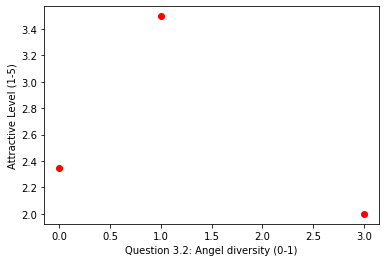

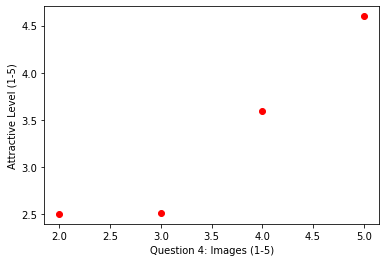

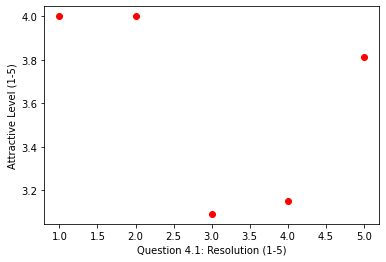

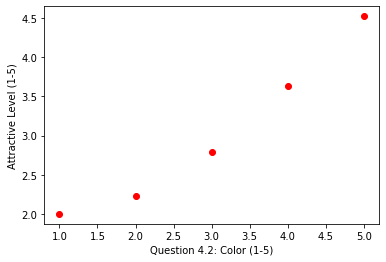

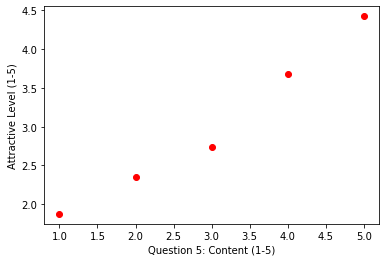

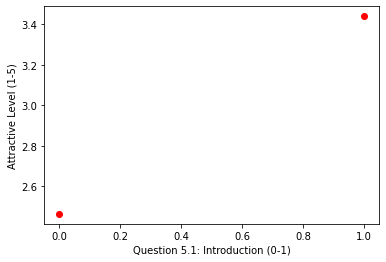

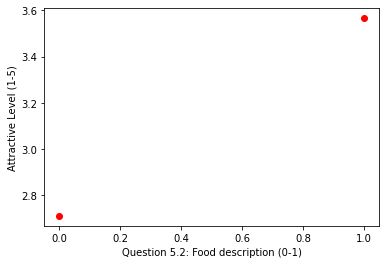

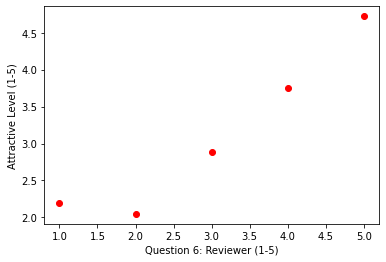

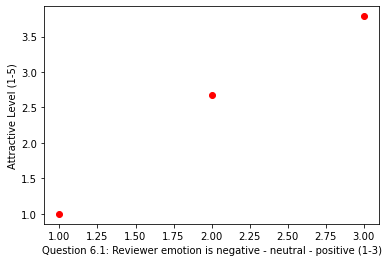

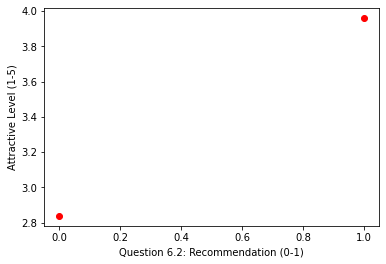

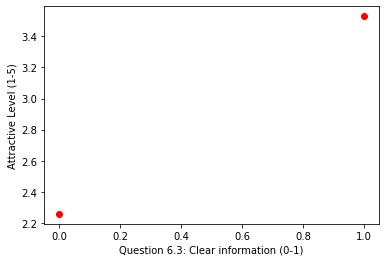

In [16]:
for col in columns:
    ls = []
    for i in range(0, 6):
        ls.append(pf[pf[col] == i]['Attractive Level (1-5)'].mean())
    plt.plot([x for x in range(0, 6)], ls, 'ro')
    plt.xlabel(col)
    plt.ylabel(output_column)
    plt.show()